# BIOMETRIC INDEXING ON FINGERPRINTS

The main objective of this project is to develop a robust fingerprint indexing system capable of efficiently matching query fingerprints against a large database of fingerprint images.

# BACKGROUND

In the initial phase of the project, we extensively researched traditional methods for fingerprint indexing. Our investigation led us to the widely used Minutiae Cylinder Code (MCC) method.

# MINUTIAE POINTS WITH MCC  

(-0.5, 203.5, 246.5, -0.5)

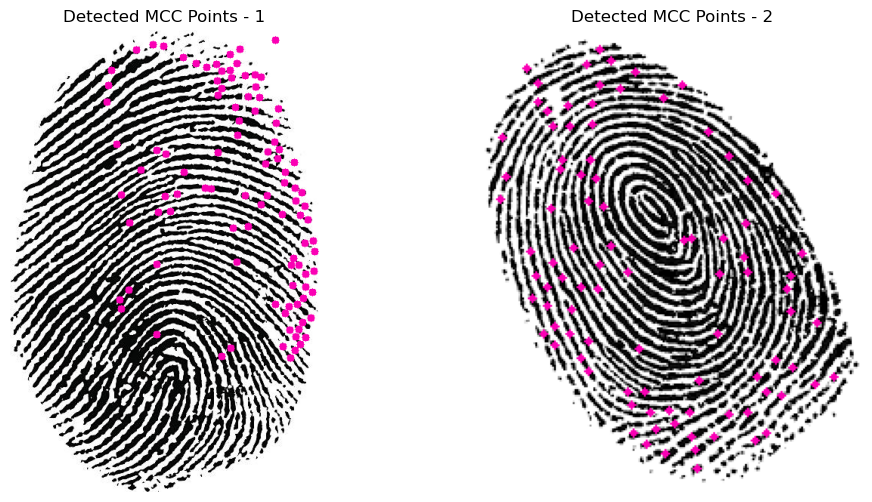

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_mcc(image, num_features=100):
    # Apply morphological closing to enhance the ridges
    kernel = np.ones((3, 3), np.uint8)
    closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # Calculate gradient magnitude using Sobel operator
    grad_x = cv2.Sobel(closed_image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(closed_image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # Apply adaptive thresholding to obtain binary image
    binary_image = cv2.adaptiveThreshold(gradient_magnitude.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract MCC features
    mcc_points = []
    for contour in contours:
        # Fit ellipse to each contour
        if len(contour) > 5: 
            ellipse = cv2.fitEllipse(contour)
            center, axes, angle = ellipse

            mcc_points.append(center)

    # Select top 'num_features' most prominent MCC points based on their proximity to the center of the image
    mcc_points.sort(key=lambda p: np.linalg.norm(np.array(p) - np.array(image.shape) / 2))
    mcc_points = mcc_points[:num_features]

    # If fewer than 'num_features' points are found, duplicate the last point
    if len(mcc_points) < num_features:
        mcc_points.extend([mcc_points[-1]] * (num_features - len(mcc_points)))

    return mcc_points

# Step 1: Load Fingerprint Image
fingerprint_image = cv2.imread('fingerprint2.jpg', cv2.IMREAD_COLOR) 
fingerprint_image_2 = cv2.imread('fingerprint4.png', cv2.IMREAD_COLOR) 

# Step 2: Preprocessing (e.g., Binarization) using OpenCV
gray_image = cv2.cvtColor(fingerprint_image, cv2.COLOR_BGR2GRAY)
_, binarized_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

gray_image_2 = cv2.cvtColor(fingerprint_image_2, cv2.COLOR_BGR2GRAY)
_, binarized_image_2 = cv2.threshold(gray_image_2, 128, 255, cv2.THRESH_BINARY)

# Step 3: Extract MCC Features
mcc_points = extract_mcc(binarized_image)

mcc_points_2 = extract_mcc(binarized_image_2)

# Define color for the MCC points (green)
color = (180,0,250)  

# Step 4: Display MCC Points on the original image
for mcc_point in mcc_points:
    x, y = mcc_point
    cv2.circle(fingerprint_image, (int(x), int(y)), 5, color, -1) 

for mcc_point_2 in mcc_points_2:
    x, y = mcc_point_2
    cv2.circle(fingerprint_image_2, (int(x), int(y)), 2, color, -1)

plt.figure(figsize=(12, 6))

# Display the fingerprint image with detected MCC points
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(fingerprint_image, cv2.COLOR_BGR2RGB))
plt.title('Detected MCC Points - 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(fingerprint_image_2, cv2.COLOR_BGR2RGB))
plt.title('Detected MCC Points - 2')
plt.axis('off')


We noticed MCC points were concentrated in certain regions and sought to work further.
After further exploration, we discovered the Fast Fourier Transform (FFT) method, which showed promise in capturing intricate details of fingerprint images.

# FAST FOURIER TRANSFORM (FFT)

### Feature Extraction
-> Extract relevant features from fingerprint images using techniques such as FFT-based feature extraction.

-> Normalize feature vectors to ensure consistent representation across different fingerprints.

# POWER SPECTRUM ON FINGER PRINT-1

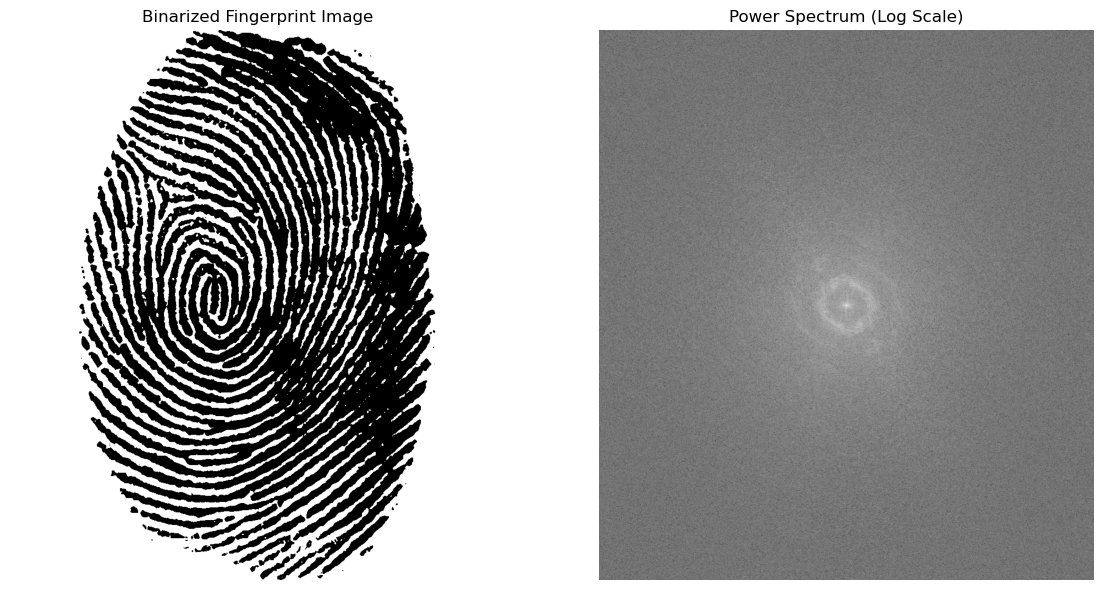

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Fingerprint Image
fingerprint_image = cv2.imread('fingerprint-Copy1.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Preprocessing (e.g., Binarization) using OpenCV
_, binarized_image = cv2.threshold(fingerprint_image, 128, 255, cv2.THRESH_BINARY)

# Step 3: Compute Fourier Transform
fingerprint_fft = np.fft.fft2(binarized_image)

# Step 4: Compute Power Spectrum
power_spectrum = np.abs(np.fft.fftshift(fingerprint_fft)) ** 2

# Step 5: Display Power Spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(binarized_image, cmap='gray')
plt.title('Binarized Fingerprint Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(power_spectrum + 1), cmap='gray')
plt.title('Power Spectrum (Log Scale)')
plt.axis('off')

plt.tight_layout()
plt.show()


# POWER SPECTRUM ON FINGER PRINT-2

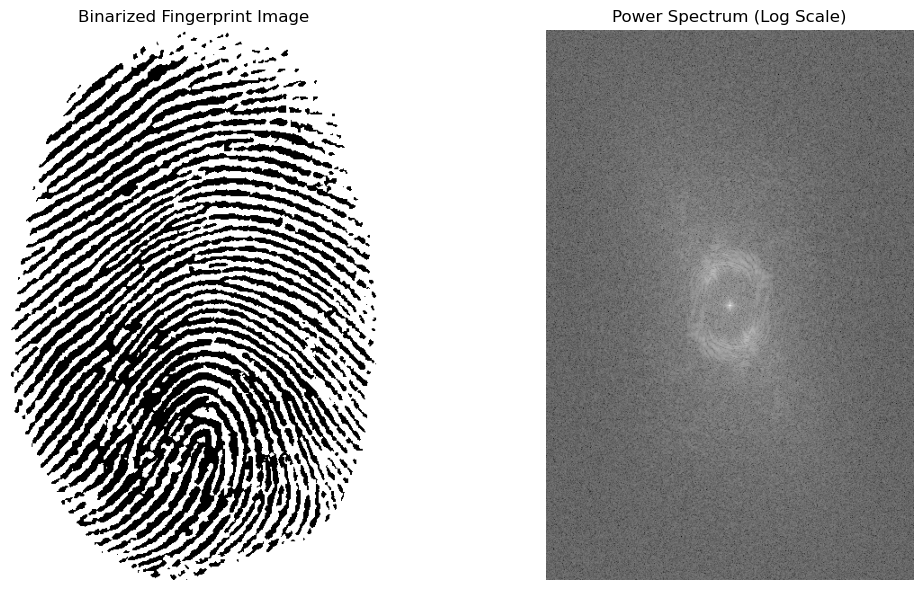

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Fingerprint Image
fingerprint_image = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Preprocessing (e.g., Binarization) using OpenCV
_, binarized_image = cv2.threshold(fingerprint_image, 128, 255, cv2.THRESH_BINARY)

# Step 3: Compute Fourier Transform
fingerprint_fft = np.fft.fft2(binarized_image)

# Step 4: Compute Power Spectrum
power_spectrum = np.abs(np.fft.fftshift(fingerprint_fft)) ** 2

# Step 5: Display Power Spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(binarized_image, cmap='gray')
plt.title('Binarized Fingerprint Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(power_spectrum + 1), cmap='gray')
plt.title('Power Spectrum (Log Scale)')
plt.axis('off')

plt.tight_layout()
plt.show()


# SIMILARITY 

In [18]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr

# Step 1: Load Fingerprint Images
fingerprint_image1 = cv2.imread('fingerprint.jpg', cv2.IMREAD_GRAYSCALE)
fingerprint_image2 = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Preprocessing and Fourier Transform
def compute_power_spectrum(image):
    _, binarized_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    fingerprint_fft = np.fft.fft2(binarized_image)
    power_spectrum = np.abs(np.fft.fftshift(fingerprint_fft)) ** 2
    return power_spectrum

power_spectrum1 = compute_power_spectrum(fingerprint_image1)
power_spectrum2 = compute_power_spectrum(fingerprint_image2)

# Step 3: Resize Power Spectra Arrays to Match Dimensions
min_shape = (min(power_spectrum1.shape[0], power_spectrum2.shape[0]),
             min(power_spectrum1.shape[1], power_spectrum2.shape[1]))
power_spectrum1_resized = cv2.resize(power_spectrum1, min_shape[::-1])
power_spectrum2_resized = cv2.resize(power_spectrum2, min_shape[::-1])

# Step 4: Compute Similarity Metric
# For example, Pearson correlation coefficient
pearson_correlation, _ = pearsonr(power_spectrum1_resized.flatten(), power_spectrum2_resized.flatten())

# Resize fingerprint images to match dimensions for SSIM computation
fingerprint_image1_resized = cv2.resize(fingerprint_image1, min_shape[::-1])
fingerprint_image2_resized = cv2.resize(fingerprint_image2, min_shape[::-1])

# Compute SSIM
ssim_index = ssim(fingerprint_image1_resized, fingerprint_image2_resized)

print("Pearson Correlation Coefficient:", pearson_correlation)
print("Structural Similarity Index (SSIM):", ssim_index)


Pearson Correlation Coefficient: 0.9989207233439649
Structural Similarity Index (SSIM): 0.12167226580977837


# TOWARDS QUADRANTS

If FFT is effective, why not divide image into 4 quadrants, compute power spectra for each and take average?

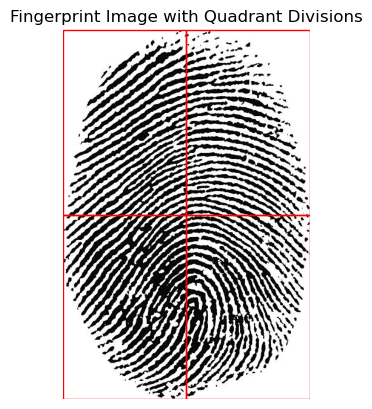

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Load Fingerprint Image
fingerprint_image = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Divide the Fingerprint Image
height, width = fingerprint_image.shape
half_height, half_width = height // 2, width // 2

# Define regions (4 quadrants)
regions = [
    fingerprint_image[:half_height, :half_width],    # Top left quadrant
    fingerprint_image[:half_height, half_width:],    # Top right quadrant
    fingerprint_image[half_height:, :half_width],    # Bottom left quadrant
    fingerprint_image[half_height:, half_width:]    # Bottom right quadrant
]

# Step 3: Apply FFT to Each Region
power_spectra = []
for region in regions:
    # Apply FFT
    fft_region = np.fft.fft2(region)
    power_spectrum = np.abs(np.fft.fftshift(fft_region)) ** 2
    power_spectra.append(power_spectrum)

# Step 4: Extract Features from Each Region
features = []
for power_spectrum in power_spectra:
    # Compute mean and variance
    mean_power = np.mean(power_spectrum)
    var_power = np.var(power_spectrum)
    features.append([mean_power, var_power])

# Step 5: Combine Features from All Regions
feature_vector = np.concatenate(features)

# Step 6: Visualize Divisions of the Fingerprint Image
fig, ax = plt.subplots()
ax.imshow(fingerprint_image, cmap='gray')

# Add rectangles to show the divisions
ax.add_patch(patches.Rectangle((0, 0), half_width, half_height, linewidth=1, edgecolor='r', facecolor='none'))
ax.add_patch(patches.Rectangle((half_width, 0), half_width, half_height, linewidth=1, edgecolor='r', facecolor='none'))
ax.add_patch(patches.Rectangle((0, half_height), half_width, half_height, linewidth=1, edgecolor='r', facecolor='none'))
ax.add_patch(patches.Rectangle((half_width, half_height), half_width, half_height, linewidth=1, edgecolor='r', facecolor='none'))

plt.title('Fingerprint Image with Quadrant Divisions')
plt.axis('off')
plt.show()


# FEATURE VECTOR AND POWER SPECTRA OF REGIONS

Feature Vector:
 [2.46543365e+09 1.67024481e+23 2.72575373e+09 2.43992184e+23
 2.12130225e+09 9.67712885e+22 2.44232809e+09 1.63876481e+23]


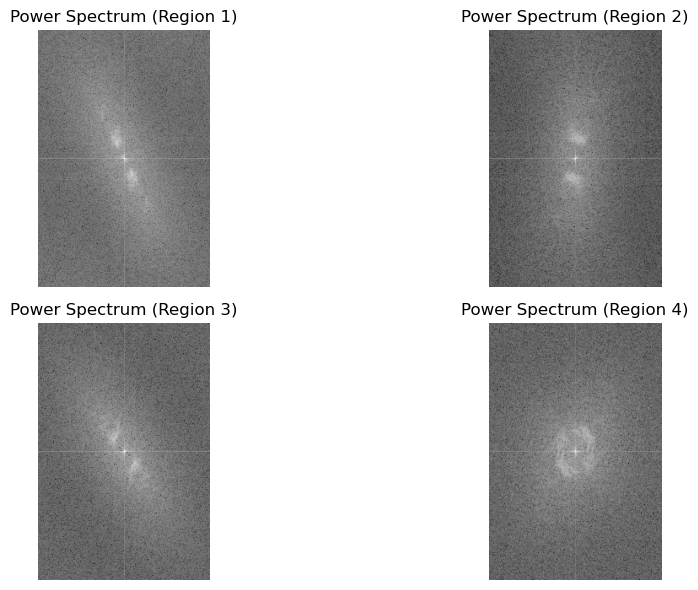

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Fingerprint Image
fingerprint_image = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Divide the Fingerprint Image
height, width = fingerprint_image.shape
half_height, half_width = height // 2, width // 2

# Define regions (4 quadrants)
regions = [
    fingerprint_image[:half_height, :half_width],    # Top left quadrant
    fingerprint_image[:half_height, half_width:],    # Top right quadrant
    fingerprint_image[half_height:, :half_width],    # Bottom left quadrant
    fingerprint_image[half_height:, half_width:]    # Bottom right quadrant
]

# Step 3: Apply FFT to Each Region
power_spectra = []
for region in regions:
    # Apply FFT
    fft_region = np.fft.fft2(region)
    power_spectrum = np.abs(np.fft.fftshift(fft_region)) ** 2
    power_spectra.append(power_spectrum)

# Step 4: Extract Features from Each Region
features = []
for power_spectrum in power_spectra:
    mean_power = np.mean(power_spectrum)
    var_power = np.var(power_spectrum)
    features.append([mean_power, var_power])

# Step 5: Combine Features from All Regions
feature_vector = np.concatenate(features)

# Display the feature vector
print("Feature Vector:\n", feature_vector)

# Visualize the power spectra of each region (optional)
plt.figure(figsize=(12, 6))
for i, power_spectrum in enumerate(power_spectra, 1):
    plt.subplot(2, 2, i)
    plt.imshow(np.log(power_spectrum + 1), cmap='gray')
    plt.title(f'Power Spectrum (Region {i})')
    plt.axis('off')

plt.tight_layout()
plt.show()


# INDEXING METHOD

In [21]:
pip install datasketch


Note: you may need to restart the kernel to use updated packages.


# USING DATASKETCH

In [22]:
from datasketch import MinHash, MinHashLSH

# Step 1: Define the number of permutations for MinHash
num_perm = 128

# Step 2: Initialize the LSH index
lsh = MinHashLSH(threshold=0.5, num_perm=num_perm)

# Step 3: Convert feature vectors to MinHash objects and add them to the LSH index
feature_vectors = [
    [2.46543365e+09, 1.67024481e+23, 2.72575373e+09, 2.43992184e+23],
    [2.12130225e+09, 9.67712885, 2.44232809e+09, 1.63876481e+22]
]

for idx, vector in enumerate(feature_vectors):
    minhash = MinHash(num_perm=num_perm)
    for val in vector:
        minhash.update(str(val).encode('utf-8'))
    lsh.insert(str(idx), minhash)

# Step 4: Query the LSH index to find similar feature vectors
query_vector = [2.12130225e+09, 9.67712885e+22, 2.44232809e+09, 1.63876481e+23]
query_minhash = MinHash(num_perm=num_perm)
for val in query_vector:
    query_minhash.update(str(val).encode('utf-8'))

result = lsh.query(query_minhash)
print("Similar feature vectors found:", result)


Similar feature vectors found: ['1']


# TILTED FEATURE VECTOR

In [23]:
import cv2
import numpy as np
from scipy.fft import fftn, fftshift
from skimage.measure import block_reduce

def align_fingerprint(image):
    aligned_image = image 
    return aligned_image

def segment_fingerprint(image):
    segmented_image = image  
    return segmented_image

def extract_feature_vector(image):
    # Align and segment the fingerprint image
    aligned_image = align_fingerprint(image)
    segmented_image = segment_fingerprint(aligned_image)
    
    # Apply FFT to compute the Power Spectrum
    power_spectrum = np.abs(fftshift(fftn(segmented_image))) ** 2
    
    # Divide Power Spectrum into quadrants and extract feature vector
    num_quadrants = 4
    quadrant_size = tuple(np.array(power_spectrum.shape) // num_quadrants)
    feature_vector = []
    for i in range(num_quadrants):
        for j in range(num_quadrants):
            quadrant = power_spectrum[i * quadrant_size[0]: (i + 1) * quadrant_size[0],
                                       j * quadrant_size[1]: (j + 1) * quadrant_size[1]]
            feature_vector.append(np.mean(quadrant))
    return feature_vector

fingerprint_image = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)

# Extract feature vector for the fingerprint image
feature_vector = extract_feature_vector(fingerprint_image)
print("Feature Vector:\n", feature_vector)


Feature Vector:
 [225631513.13860843, 455771594.34145665, 323436376.61557126, 165159958.3976344, 289877545.42553806, 12376427436.25835, 9776716835.64078, 224623614.11368704, 222291989.73459315, 9930479866.66912, 120986371706.2972, 296787184.39796907, 164599261.24435914, 326468522.05070627, 460551754.80176455, 228808966.61192504]


# MORE QUADRANTS

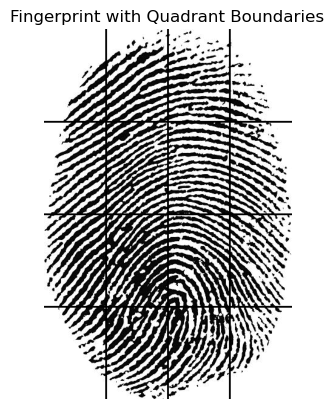

In [24]:
import cv2
import numpy as np
from scipy.fft import fftn, fftshift
import matplotlib.pyplot as plt

def align_fingerprint(image):
    return image  

def segment_fingerprint(image):
    return image

def extract_feature_vector(image):
    # Align and segment the fingerprint image
    aligned_image = align_fingerprint(image)
    segmented_image = segment_fingerprint(aligned_image)
    
    # Apply FFT to compute the Power Spectrum
    power_spectrum = np.abs(fftshift(fftn(segmented_image))) ** 2
    
    # Divide Power Spectrum into quadrants
    num_quadrants = 4
    quadrant_size = tuple(np.array(power_spectrum.shape) // num_quadrants)
    
    # Visualize the quadrants on the original image
    image_with_quadrants = segmented_image.copy()
    for i in range(1, num_quadrants):
        cv2.line(image_with_quadrants, (0, i * quadrant_size[0]), (image.shape[1], i * quadrant_size[0]), (0, 0, 0), 2)
        cv2.line(image_with_quadrants, (i * quadrant_size[1], 0), (i * quadrant_size[1], image.shape[0]), (0, 0, 0), 2)
    
    # Display the image with quadrant boundaries
    plt.imshow(image_with_quadrants, cmap='gray')
    plt.title('Fingerprint with Quadrant Boundaries')
    plt.axis('off')
    plt.show()

fingerprint_image = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)

# Extract feature vector for the fingerprint image
extract_feature_vector(fingerprint_image)


# GRID METHOD 
### USING RELATIVE MINUTIAE SPATIAL COORDINATES AS VECTOR COMPONENTS

First 10-15 Values of Feature Vector for Image 1:
(15, 3, 12, -179)
(15, 3, 2, -200)
(15, 3, 4, -218)
(15, 3, 5, -221)
(15, 3, 10, -248)
(15, 3, 12, -254)
First 10-15 Values of Feature Vector for Image 2:
(6, 7, -5, -172)
(6, 7, 1, -190)
(6, 7, 6, -211)
(6, 7, 5, -222)
(6, 7, -8, -242)
(6, 7, -8, -253)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Similarity Metrics: (0.9995674872264498, 1.9470746177405757e-05)


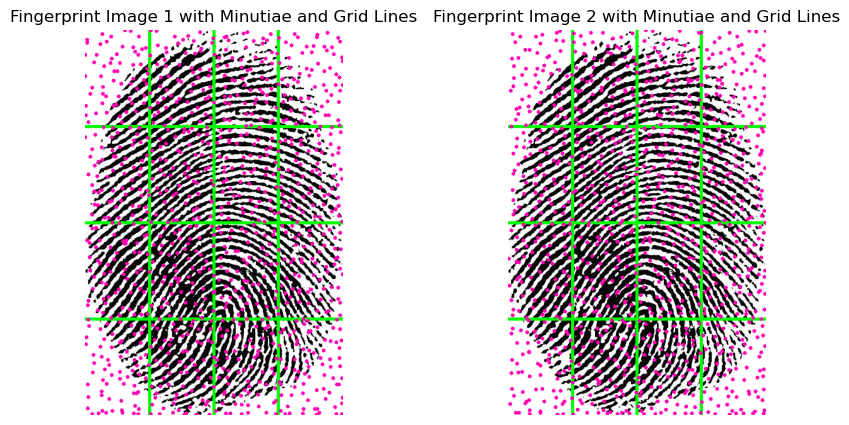

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

def align_fingerprint(image):
    return image 

def segment_fingerprint(image):
    return image 

def detect_minutiae(image, block_size=16):
    height, width = image.shape
    minutiae = []
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            x = np.random.randint(i, min(i+block_size, height))
            y = np.random.randint(j, min(j+block_size, width))
            minutiae.append((x, y))
    return minutiae

def encode_minutiae(minutiae):
    encoded_minutiae = []
    for i, minutia in enumerate(minutiae):
        for j, neighbor in enumerate(minutiae):
            if i != j:
                relative_x = minutia[0] - neighbor[0]
                relative_y = minutia[1] - neighbor[1]
                encoded_minutiae.append((minutia[0], minutia[1], relative_x, relative_y))
    return encoded_minutiae

def extract_feature_vector(image):
    aligned_image = align_fingerprint(image)
    segmented_image = segment_fingerprint(aligned_image)
    minutiae = detect_minutiae(segmented_image)
    feature_vector = encode_minutiae(minutiae)
    return feature_vector

def plot_minutiae(image, minutiae, grid_size=(4, 4)):
    for i in range(1, grid_size[0]):
        cv2.line(image, (0, i * image.shape[0] // grid_size[0]), (image.shape[1], i * image.shape[0] // grid_size[0]), (0, 255, 0), 3)
    for j in range(1, grid_size[1]):
        cv2.line(image, (j * image.shape[1] // grid_size[1], 0), (j * image.shape[1] // grid_size[1], image.shape[0]), (0, 255, 0), 3)

    for minutia in minutiae:
        x, y = minutia[0], minutia[1]
        cv2.circle(image, (y, x), 3, (180, 0, 255), -1)

    return image

fingerprint_image1 = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)
fingerprint_image2 = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)

feature_vector1 = extract_feature_vector(fingerprint_image1)
feature_vector2 = extract_feature_vector(fingerprint_image2)

print("First 10-15 Values of Feature Vector for Image 1:")
for i in range(10, 16):
    print(feature_vector1[i])

print("First 10-15 Values of Feature Vector for Image 2:")
for i in range(10, 16):
    print(feature_vector2[i])

def cosine_similarity_measure(vec1, vec2):
    vec1 = np.array(vec1).reshape(1, -1)
    vec2 = np.array(vec2).reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]

def jaccard_similarity_measure(vec1, vec2):
    set1 = set(map(tuple, vec1))
    set2 = set(map(tuple, vec2))

    mlb = MultiLabelBinarizer()
    binary_set1 = mlb.fit_transform([set1])
    binary_set2 = mlb.transform([set2])

    return jaccard_score(binary_set1, binary_set2, average='micro')

def compare_fingerprints(feature_vector1, feature_vector2):
    min_length = min(len(feature_vector1), len(feature_vector2))
    feature_vector1 = feature_vector1[:min_length]
    feature_vector2 = feature_vector2[:min_length]

    cosine_sim = cosine_similarity_measure(feature_vector1, feature_vector2)
    jaccard_sim = jaccard_similarity_measure(feature_vector1, feature_vector2)

    return cosine_sim, jaccard_sim

similarity_metric = compare_fingerprints(feature_vector1, feature_vector2)
print("Similarity Metrics:", similarity_metric)

image_with_minutiae1 = plot_minutiae(cv2.cvtColor(fingerprint_image1, cv2.COLOR_GRAY2BGR), feature_vector1)
image_with_minutiae2 = plot_minutiae(cv2.cvtColor(fingerprint_image2, cv2.COLOR_GRAY2BGR), feature_vector2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image_with_minutiae1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Fingerprint Image 1 with Minutiae and Grid Lines')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(image_with_minutiae2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Fingerprint Image 2 with Minutiae and Grid Lines')
axes[1].axis('off')
plt.show()


### USING RELATIVE FFT FEATURES OF NEIGHBOUR GRIDS AS VECTOR COMPONENTS

Merged Feature Vector for Image 1:
[8.55010277e+08 8.54046036e+21 8.55010277e+08 ... 1.60186332e+21
 5.35913462e+08 1.60186332e+21]
Individual Feature Vectors for Image 1:
[[855010276.9999999, 8.540460359563896e+21], [571437994.0, 1.999303937759883e+21], [643005637.9999999, 3.12676196402708e+21], [909563306.0000001, 1.0862976953133822e+22], [607600602.0, 2.50895820940231e+21], [431384772.0, 7.517579773792686e+20], [508391669.9999999, 1.3541638628741709e+21], [644895462.0000001, 3.174568540089356e+21], [479848838.0, 1.0862966393348318e+21], [319006250.99999994, 2.5533169068814883e+20], [437963316.0, 7.839214330898304e+20], [598458330.9999999, 2.4515083349192543e+21], [854188148.0, 8.564511135190061e+21], [468259012.99999994, 9.85703670878557e+20], [535913461.9999999, 1.6018633216252104e+21], [850095330.0, 8.557537696144121e+21]]


Merged Feature Vector for Image 2:
[8.55010277e+08 8.54046036e+21 8.55010277e+08 ... 1.60186332e+21
 5.35913462e+08 1.60186332e+21]
Individual Feature Vectors

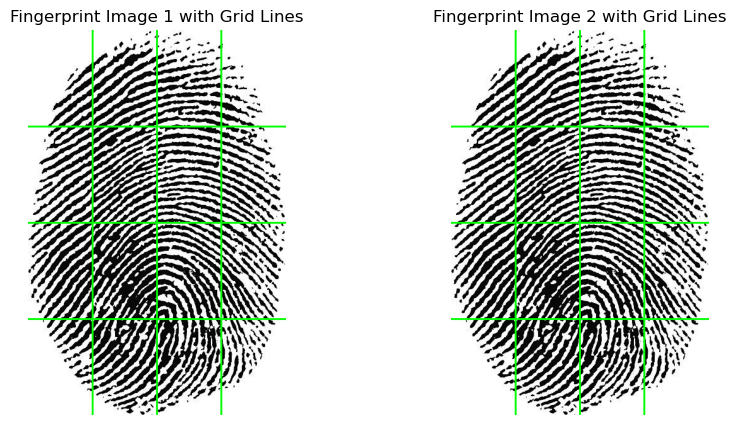

In [27]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

def align_fingerprint(image):
    return image  

def segment_fingerprint(image):
    return image  

def merge_neighbors_features(features, num_neighbors):
    # Merge features from neighboring blocks
    merged_features = []
    for i in range(len(features)):
        merged_feature = features[i].copy()
        for di in range(-num_neighbors, num_neighbors + 1):
            for dj in range(-num_neighbors, num_neighbors + 1):
                if di == 0 and dj == 0:
                    continue  
                if 0 <= i + di < len(features):
                    merged_feature += features[i + di][:]
        merged_features.append(merged_feature)
    return merged_features

def extract_fft_features_with_neighbors(image, grid_size=(4, 4), num_neighbors=1):
    # Divide the fingerprint image into a grid of smaller blocks
    height, width = image.shape
    block_height, block_width = height // grid_size[0], width // grid_size[1]

    features = []
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Extract the block
            block = image[i * block_height: (i+1) * block_height, j * block_width: (j+1) * block_width]

            # Apply FFT to the block and extract features
            fft_block = np.fft.fft2(block)
            power_spectrum = np.abs(np.fft.fftshift(fft_block)) ** 2
            mean_power = np.mean(power_spectrum)
            var_power = np.var(power_spectrum)
            features.append([mean_power, var_power])

            # Extract features from neighboring blocks
            for di in range(-num_neighbors, num_neighbors+1):
                for dj in range(-num_neighbors, num_neighbors+1):
                    if di == 0 and dj == 0:
                        continue  # Skip the current block
                    if 0 <= i + di < grid_size[0] and 0 <= j + dj < grid_size[1]:
                        neighbor_block = image[(i+di) * block_height: (i+di+1) * block_height,
                                               (j+dj) * block_width: (j+dj+1) * block_width]
                        fft_neighbor_block = np.fft.fft2(neighbor_block)
                        power_spectrum_neighbor = np.abs(np.fft.fftshift(fft_neighbor_block)) ** 2
                        mean_power_neighbor = np.mean(power_spectrum_neighbor)
                        var_power_neighbor = np.var(power_spectrum_neighbor)
                        features.append([mean_power_neighbor, var_power_neighbor])

    # Merge features from neighboring blocks
    merged_features = merge_neighbors_features(features, num_neighbors)

    # Combine features from all blocks
    feature_vector = np.concatenate(merged_features)

    return feature_vector

def extract_individual_feature_vectors(image, grid_size=(4, 4)):
    # Divide the fingerprint image into a grid of smaller blocks
    height, width = image.shape
    block_height, block_width = height // grid_size[0], width // grid_size[1]

    individual_feature_vectors = []
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Extract the block
            block = image[i * block_height: (i+1) * block_height, j * block_width: (j+1) * block_width]

            # Apply FFT to the block and extract features
            fft_block = np.fft.fft2(block)
            power_spectrum = np.abs(np.fft.fftshift(fft_block)) ** 2
            mean_power = np.mean(power_spectrum)
            var_power = np.var(power_spectrum)
            individual_feature_vectors.append([mean_power, var_power])

    return individual_feature_vectors

def extract_feature_vectors(image, grid_size=(4, 4), num_neighbors=1):
    # Align and segment the fingerprint image
    aligned_image = align_fingerprint(image)
    segmented_image = segment_fingerprint(aligned_image)

    # Extract FFT-based features from the segmented image
    merged_feature_vector = extract_fft_features_with_neighbors(segmented_image, grid_size, num_neighbors)

    # Extract individual feature vectors for each block
    individual_feature_vectors = extract_individual_feature_vectors(segmented_image, grid_size)

    return merged_feature_vector, individual_feature_vectors


fingerprint_image1 = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)
fingerprint_image2 = cv2.imread('fingerprint2.jpg', cv2.IMREAD_GRAYSCALE)

# Extract feature vectors for the fingerprint images
merged_feature_vector1, individual_feature_vectors1 = extract_feature_vectors(fingerprint_image1)
merged_feature_vector2, individual_feature_vectors2 = extract_feature_vectors(fingerprint_image2)

print("Merged Feature Vector for Image 1:")
print(merged_feature_vector1)
print("Individual Feature Vectors for Image 1:")
print(individual_feature_vectors1)

print("\n")

print("Merged Feature Vector for Image 2:")
print(merged_feature_vector2)
print("Individual Feature Vectors for Image 2:")
print(individual_feature_vectors2)

def euclidean_distance(vec1, vec2):
    # Compute Euclidean distance between two feature vectors
    return np.linalg.norm(np.array(vec1) - np.array(vec2))

def cosine_similarity_measure(vec1, vec2):
    # Reshape feature vectors to be two-dimensional arrays
    vec1 = np.array(vec1).reshape(1, -1)
    vec2 = np.array(vec2).reshape(1, -1)
    # Compute Cosine similarity between two feature vectors
    return cosine_similarity(vec1, vec2)[0][0]

def jaccard_similarity_measure(vec1, vec2):
    # Convert feature vectors to sets of tuples
    set1 = set(map(tuple, vec1.reshape(-1, 2)))
    set2 = set(map(tuple, vec2.reshape(-1, 2)))

    # Convert sets of tuples to binary label indicators
    mlb = MultiLabelBinarizer()
    binary_set1 = mlb.fit_transform([set1])
    binary_set2 = mlb.transform([set2])

    # Compute Jaccard similarity coefficient
    return jaccard_score(binary_set1, binary_set2, average='micro')

def compare_fingerprints(merged_feature_vector1, merged_feature_vector2):
    # Compute Euclidean distance between the merged feature vectors
    euclidean_dist = euclidean_distance(merged_feature_vector1, merged_feature_vector2)
    cosine_sim = cosine_similarity_measure(merged_feature_vector1, merged_feature_vector2)
    jaccard_sim = jaccard_similarity_measure(merged_feature_vector1, merged_feature_vector2)

    return euclidean_dist, cosine_sim, jaccard_sim

print("\n")

# Compare the merged fingerprint feature vectors
similarity_metric = compare_fingerprints(merged_feature_vector1, merged_feature_vector2)
print("Similarity Metrics between Merged Feature Vectors:", similarity_metric)

def plot_grids(image, grid_size=(4, 4)):
    # Draw vertical grid lines
    for i in range(1, grid_size[0]):
        cv2.line(image, (0, i * image.shape[0] // grid_size[0]), (image.shape[1], i * image.shape[0] // grid_size[0]), (0, 255, 0), 2)
    # Draw horizontal grid lines
    for j in range(1, grid_size[1]):
        cv2.line(image, (j * image.shape[1] // grid_size[1], 0), (j * image.shape[1] // grid_size[1], image.shape[0]), (0, 255, 0), 2)
    return image

image_with_grids1 = plot_grids(cv2.cvtColor(fingerprint_image1, cv2.COLOR_GRAY2BGR))
image_with_grids2 = plot_grids(cv2.cvtColor(fingerprint_image2, cv2.COLOR_GRAY2BGR))

print("\n\n")

# Display the fingerprint images with grids
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image_with_grids1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Fingerprint Image 1 with Grid Lines')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(image_with_grids2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Fingerprint Image 2 with Grid Lines')
axes[1].axis('off')
plt.show()

Clearly the GRID is the winner!

## GRID METHOD IMPLEMENTED ON DATABASE OF FINGERPRINTS

In [28]:
import os
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

def align_fingerprint(image):
    # Placeholder code for demonstration purposes
    return image  # Placeholder, replace with actual alignment code

def segment_fingerprint(image):
    # Placeholder code for demonstration purposes
    return image  # Placeholder, replace with actual segmentation code

def merge_neighbors_features(features, num_neighbors):
    # Merge features from neighboring blocks
    merged_features = []
    for i in range(len(features)):
        merged_feature = features[i].copy()  # Start with the feature of the current block
        for di in range(-num_neighbors, num_neighbors + 1):
            for dj in range(-num_neighbors, num_neighbors + 1):
                if di == 0 and dj == 0:
                    continue  # Skip the current block
                if 0 <= i + di < len(features):
                    merged_feature += features[i + di][:]
        merged_features.append(merged_feature)
    return merged_features

def extract_fft_features_with_neighbors(image, grid_size=(4, 4), num_neighbors=1):
    # Divide the fingerprint image into a grid of smaller blocks
    height, width = image.shape
    block_height, block_width = height // grid_size[0], width // grid_size[1]

    features = []
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Extract the block
            block = image[i * block_height: (i+1) * block_height, j * block_width: (j+1) * block_width]

            # Apply FFT to the block and extract features
            fft_block = np.fft.fft2(block)
            power_spectrum = np.abs(np.fft.fftshift(fft_block)) ** 2
            mean_power = np.mean(power_spectrum)
            var_power = np.var(power_spectrum)
            features.append([mean_power, var_power])

            # Extract features from neighboring blocks
            for di in range(-num_neighbors, num_neighbors+1):
                for dj in range(-num_neighbors, num_neighbors+1):
                    if di == 0 and dj == 0:
                        continue  # Skip the current block
                    if 0 <= i + di < grid_size[0] and 0 <= j + dj < grid_size[1]:
                        neighbor_block = image[(i+di) * block_height: (i+di+1) * block_height,
                                               (j+dj) * block_width: (j+dj+1) * block_width]
                        fft_neighbor_block = np.fft.fft2(neighbor_block)
                        power_spectrum_neighbor = np.abs(np.fft.fftshift(fft_neighbor_block)) ** 2
                        mean_power_neighbor = np.mean(power_spectrum_neighbor)
                        var_power_neighbor = np.var(power_spectrum_neighbor)
                        features.append([mean_power_neighbor, var_power_neighbor])

    # Merge features from neighboring blocks
    merged_features = merge_neighbors_features(features, num_neighbors)

    # Combine features from all blocks
    feature_vector = np.concatenate(merged_features)

    return feature_vector

def extract_individual_feature_vectors(image, grid_size=(4, 4)):
    # Divide the fingerprint image into a grid of smaller blocks
    height, width = image.shape
    block_height, block_width = height // grid_size[0], width // grid_size[1]

    individual_feature_vectors = []
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Extract the block
            block = image[i * block_height: (i+1) * block_height, j * block_width: (j+1) * block_width]

            # Apply FFT to the block and extract features
            fft_block = np.fft.fft2(block)
            power_spectrum = np.abs(np.fft.fftshift(fft_block)) ** 2
            mean_power = np.mean(power_spectrum)
            var_power = np.var(power_spectrum)
            individual_feature_vectors.append([mean_power, var_power])

    return individual_feature_vectors

def extract_feature_vectors(image, grid_size=(4, 4), num_neighbors=1):
    # Align and segment the fingerprint image
    aligned_image = align_fingerprint(image)
    segmented_image = segment_fingerprint(aligned_image)

    # Extract FFT-based features from the segmented image
    merged_feature_vector = extract_fft_features_with_neighbors(segmented_image, grid_size, num_neighbors)

    # Extract individual feature vectors for each block
    individual_feature_vectors = extract_individual_feature_vectors(segmented_image, grid_size)

    return merged_feature_vector, individual_feature_vectors

# Function to process a folder containing fingerprint images
def process_fingerprint_folder(folder_path):
    all_merged_feature_vectors = []
    all_individual_feature_vectors = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".tif") or filename.endswith(".png"):
            # Load the fingerprint image
            image_path = os.path.join(folder_path, filename)
            fingerprint_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Extract feature vectors for the fingerprint image
            merged_feature_vector, individual_feature_vectors = extract_feature_vectors(fingerprint_image)

            # Append feature vectors to the lists
            all_merged_feature_vectors.append(merged_feature_vector)
            all_individual_feature_vectors.append(individual_feature_vectors)

    return all_merged_feature_vectors, all_individual_feature_vectors

folder_path = "DB_1"
all_merged_feature_vectors, all_individual_feature_vectors = process_fingerprint_folder(folder_path)

# Print the results for each image
for i, (merged_feature_vector, individual_feature_vectors) in enumerate(zip(all_merged_feature_vectors, all_individual_feature_vectors), 1):
    print(f"Features for Image {i}:")
    print("Merged Feature Vector:")
    print(merged_feature_vector)
    print("Individual Feature Vectors:")
    print(individual_feature_vectors)





Features for Image 1:
Merged Feature Vector:
[2.63580358e+08 3.85302849e+20 2.63580358e+08 ... 1.22444585e+20
 1.50862949e+08 1.22444585e+20]
Individual Feature Vectors:
[[263580358.0, 3.8530284935908026e+20], [205291117.9999999, 2.330551544774296e+20], [196719736.0, 2.105614700062397e+20], [270822510.0, 4.016271762662228e+20], [224977397.00000003, 2.775089215938613e+20], [149167043.0, 1.1968921370715147e+20], [128156056.0, 8.584206989407766e+19], [199492656.0, 2.083754443838372e+20], [198222747.0000001, 2.1566627833223814e+20], [119224633.00000001, 7.557511272988867e+19], [122309344.0, 7.975217845917021e+19], [157175181.99999994, 1.3219537805909234e+20], [226534793.0, 2.8262604841837416e+20], [165326145.00000003, 1.4815286846355236e+20], [150862948.99999997, 1.2244458450166253e+20], [175997643.99999997, 1.6764867800094746e+20]]
Features for Image 2:
Merged Feature Vector:
[2.31644009e+08 2.95735561e+20 2.31644009e+08 ... 1.15231697e+20
 1.47583246e+08 1.15231697e+20]
Individual Featur

# QUERYING TO FIND SIMILAR FINGERFRINTS IN DB

In [42]:
import os
import cv2
import numpy as np
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import cosine_similarity

class RandomProjectionHash:
    def __init__(self, n_components=64, n_neighbors=5):
        self.n_components = n_components
        self.n_neighbors = n_neighbors
        self.projection = SparseRandomProjection(n_components=n_components)

    def fit(self, X):
        self.projection.fit(X)

    def hash_vector(self, vector):
        vector_array = np.array(vector)  # Convert list to numpy array
        projected_vector = self.projection.transform(vector_array.reshape(1, -1)).flatten()
        hash_value = ''.join('1' if val >= 0 else '0' for val in projected_vector)
        return hash_value

def extract_fft_features(image, grid_size=(4, 4)):
    if image is None:
        raise ValueError("Image is None, check the image path or file.")

    height, width = image.shape
    block_height, block_width = height // grid_size[0], width // grid_size[1]

    features = []
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            block = image[i * block_height: (i+1) * block_height, j * block_width: (j+1) * block_width]
            fft_block = np.fft.fft2(block)
            power_spectrum = np.abs(np.fft.fftshift(fft_block)) ** 2
            mean_power = np.mean(power_spectrum)
            var_power = np.var(power_spectrum)
            features.append([mean_power, var_power])

    feature_vector = np.concatenate(features)
    return feature_vector

def normalize_feature_vector(feature_vector):
    norm = np.linalg.norm(feature_vector)
    if norm == 0:
        return feature_vector
    return feature_vector / norm

def process_fingerprint_folder(folder_path):
    all_feature_vectors = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".tif") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            fingerprint_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if fingerprint_image is None:
                print(f"Warning: Unable to load image at path: {image_path}")
                continue

            feature_vector = extract_fft_features(fingerprint_image)
            normalized_feature_vector = normalize_feature_vector(feature_vector)
            all_feature_vectors.append((filename, normalized_feature_vector))

    return all_feature_vectors

def build_index(all_feature_vectors, hash_function):
    index = {}
    for filename, feature_vector in all_feature_vectors:
        # Hash the feature vector
        hashed_vector = hash_function.hash_vector(feature_vector)

        # Store the hashed vector and its corresponding filename in the index
        if hashed_vector in index:
            index[hashed_vector].append(filename)
        else:
            index[hashed_vector] = [filename]

    return index

def search_similar_fingerprints(query_vector, hash_function, index):
    # Hash the query vector
    query_hash = hash_function.hash_vector(query_vector)

    # Retrieve filenames of similar fingerprints from the index
    similar_filenames = index.get(query_hash, [])

    return similar_filenames

def calculate_imposter_score(query_vector, all_feature_vectors):
    scores = []
    query_vector = query_vector.reshape(1, -1)
    for filename, feature_vector in all_feature_vectors:
        feature_vector = feature_vector.reshape(1, -1)
        score = cosine_similarity(query_vector, feature_vector)[0][0]
        scores.append(score)
    
    return np.mean(scores)

# Paths to the folder containing fingerprint images and the query image
folder_path = "DB_1"
query_image_path = "DB_1/102_5.tif"

# Process the fingerprint images from the folder
all_feature_vectors = process_fingerprint_folder(folder_path)

# Initialize the hash function
rph = RandomProjectionHash(n_components=64)

# Fit the hash function on the feature vectors
X = np.array([feature_vector for _, feature_vector in all_feature_vectors])
rph.fit(X)

# Build the index
index = build_index(all_feature_vectors, rph)

# Load the query image
query_image = cv2.imread(query_image_path, cv2.IMREAD_GRAYSCALE)

# Extract FFT-based features from the query image
query_vector = extract_fft_features(query_image)
normalized_query_vector = normalize_feature_vector(query_vector)

# Search for similar fingerprints
similar_filenames = search_similar_fingerprints(normalized_query_vector, rph, index)

# Calculate the imposter score
imposter_score = calculate_imposter_score(normalized_query_vector, all_feature_vectors)

print("Similar fingerprints:")
for rank, filename in enumerate(similar_filenames[:5], 1):
    print(f"Rank {rank}: Filename: {filename}")

print(f"\nImposter Score: {imposter_score:.2f}")


Similar fingerprints:
Rank 1: Filename: 102_5.tif
Rank 2: Filename: 103_8.tif
Rank 3: Filename: 104_7.tif
Rank 4: Filename: 105_6.tif
Rank 5: Filename: 106_4.tif

Imposter Score: 0.97


C:\Users\shriy\anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (32 < 64).The dimensionality of the problem will not be reduced.
  warnings.warn(


## IMPOSTER SCORE

In [43]:
print(f"\nImposter Score: {imposter_score:.2f}")


Imposter Score: 0.97


## PENETRATION AND HIT RATE

In [44]:
total_correct_matches = 0
total_queries = 0

# Define your matching criteria here
matching_threshold = 0.9  

# Iterate through the feature vectors
for query_feature_vector in all_merged_feature_vectors:
    total_queries += 1

    # Compare the query feature vector with feature vectors of other fingerprint images
    for database_feature_vector in all_merged_feature_vectors:
        similarity_score = cosine_similarity([query_feature_vector], [database_feature_vector])[0][0]

        # Check if the similarity score meets the matching criteria
        if similarity_score >= matching_threshold:
            total_correct_matches += 1
            # You may break here if you only want to count each query once for correct matches
            # break

# Print the results
print("Total Correct Matches:", total_correct_matches)
print("Total Queries:", total_queries)

# Calculate hit rate
hit_rate = (total_correct_matches / total_queries) * 100
print("Hit Rate:", hit_rate)

Total Correct Matches: 5646
Total Queries: 80
Hit Rate: 7057.5


In [45]:
total_possible_matches = len(all_merged_feature_vectors) * len(all_merged_feature_vectors)
total_correct_matches = 0

# Define your matching criteria here
matching_threshold = 0.8  # Example threshold for cosine similarity

# Iterate through the feature vectors
for query_feature_vector in all_merged_feature_vectors:
    # Compare the query feature vector with feature vectors of other fingerprint images
    for database_feature_vector in all_merged_feature_vectors:
        similarity_score = cosine_similarity([query_feature_vector], [database_feature_vector])[0][0]

        # Check if the similarity score meets the matching criteria
        if similarity_score >= matching_threshold:
            total_correct_matches += 1

# Calculate the penetration rate
penetration_rate = (total_correct_matches / total_possible_matches) * 100

print("Total Possible Matches:", total_possible_matches)
print("Total Correct Matches:", total_correct_matches)
print("Penetration Rate:", penetration_rate)


Total Possible Matches: 6400
Total Correct Matches: 6366
Penetration Rate: 99.46875


# QUERY AGAINST A NON-EXISTING FINGER PRINT

In [56]:
import os
import cv2
import numpy as np
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

class RandomProjectionHash:
    def __init__(self, n_components=128, n_neighbors=5):
        self.n_components = n_components
        self.n_neighbors = n_neighbors
        self.projection = SparseRandomProjection(n_components=n_components)

    def fit(self, X):
        self.projection.fit(X)

    def hash_vector(self, vector):
        vector_array = np.array(vector)  # Convert list to numpy array
        projected_vector = self.projection.transform(vector_array.reshape(1, -1)).flatten()
        hash_value = ''.join('1' if val >= 0 else '0' for val in projected_vector)
        return hash_value

def extract_fft_features(image, grid_size=(4, 4)):
    if image is None:
        raise ValueError("Image is None, check the image path or file.")

    height, width = image.shape
    block_height, block_width = height // grid_size[0], width // grid_size[1]

    features = []
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            block = image[i * block_height: (i+1) * block_height, j * block_width: (j+1) * block_width]
            fft_block = np.fft.fft2(block)
            power_spectrum = np.abs(np.fft.fftshift(fft_block)) ** 2
            mean_power = np.mean(power_spectrum)
            var_power = np.var(power_spectrum)
            features.append([mean_power, var_power])

    feature_vector = np.concatenate(features)
    return feature_vector

def normalize_feature_vector(feature_vector):
    norm = np.linalg.norm(feature_vector)
    if norm == 0:
        return feature_vector
    return feature_vector / norm

def process_fingerprint_folder(folder_path):
    all_feature_vectors = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".tif") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            fingerprint_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if fingerprint_image is None:
                print(f"Warning: Unable to load image at path: {image_path}")
                continue

            feature_vector = extract_fft_features(fingerprint_image)
            normalized_feature_vector = normalize_feature_vector(feature_vector)
            all_feature_vectors.append((filename, normalized_feature_vector))

    return all_feature_vectors

def build_index(all_feature_vectors, hash_function):
    index = {}
    for filename, feature_vector in all_feature_vectors:
        # Hash the feature vector
        hashed_vector = hash_function.hash_vector(feature_vector)

        # Store the hashed vector and its corresponding filename in the index
        if hashed_vector in index:
            index[hashed_vector].append(filename)
        else:
            index[hashed_vector] = [filename]

    return index

def search_similar_fingerprints(query_vector, hash_function, index, all_feature_vectors):
    # Hash the query vector
    query_hash = hash_function.hash_vector(query_vector)

    # Retrieve filenames of similar fingerprints from the index
    similar_filenames = index.get(query_hash, [])
    
    # Calculate match scores using cosine similarity
    results = []
    query_vector = query_vector.reshape(1, -1)
    for filename, feature_vector in all_feature_vectors:
        if filename in similar_filenames:
            feature_vector = feature_vector.reshape(1, -1)
            score = np.dot(query_vector, feature_vector.T) / (np.linalg.norm(query_vector) * np.linalg.norm(feature_vector))
            results.append((filename, score[0][0]))

    results.sort(key=lambda x: x[1], reverse=True)  # Sort by score in descending order
    return results

def calculate_imposter_score(query_vector, all_feature_vectors):
    scores = []
    query_vector = query_vector.reshape(1, -1)
    for filename, feature_vector in all_feature_vectors:
        feature_vector = feature_vector.reshape(1, -1)
        score = np.dot(query_vector, feature_vector.T) / (np.linalg.norm(query_vector) * np.linalg.norm(feature_vector))
        scores.append(score[0][0])
    
    return np.mean(scores)

# Paths to the folder containing fingerprint images and the query image
folder_path = "DB_1"
query_image_path = "fingerprint2.jpg"

# Process the fingerprint images from the folder
all_feature_vectors = process_fingerprint_folder(folder_path)

# Initialize the hash function
rph = RandomProjectionHash(n_components=128)

# Fit the hash function on the feature vectors
X = np.array([feature_vector for _, feature_vector in all_feature_vectors])
rph.fit(X)

# Build the index
index = build_index(all_feature_vectors, rph)

# Load the query image
query_image = cv2.imread(query_image_path, cv2.IMREAD_GRAYSCALE)

# Extract FFT-based features from the query image
query_vector = extract_fft_features(query_image)
normalized_query_vector = normalize_feature_vector(query_vector)

# Search for similar fingerprints
similar_results = search_similar_fingerprints(normalized_query_vector, rph, index, all_feature_vectors)

# Calculate the imposter score
imposter_score = calculate_imposter_score(normalized_query_vector, all_feature_vectors)

print("Similar fingerprints:")
if similar_results:
    for rank, (filename, score) in enumerate(similar_results[:5], 1):
        print(f"Rank {rank}: Filename: {filename}, Match Score: {score:.2f}")
else:
    print("No similar matches found.")

print(f"\nImposter Score: {imposter_score:.2f}")


Similar fingerprints:
No similar matches found.

Imposter Score: 0.83


C:\Users\shriy\anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (32 < 128).The dimensionality of the problem will not be reduced.
  warnings.warn(


## ROC / DAC CURVES

Similar fingerprints:
Rank 1: Filename: 102_5.tif, Match Score: 1.00
Rank 2: Filename: 103_7.tif, Match Score: 0.99
Rank 3: Filename: 106_8.tif, Match Score: 0.99
Rank 4: Filename: 108_8.tif, Match Score: 0.97
Rank 5: Filename: 104_1.tif, Match Score: 0.96

Imposter Score: 0.97


C:\Users\shriy\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


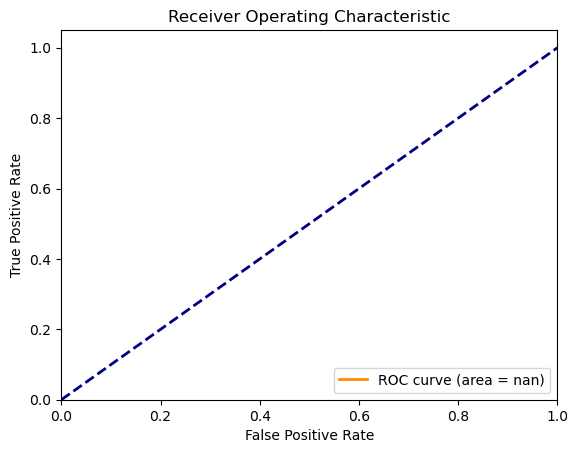

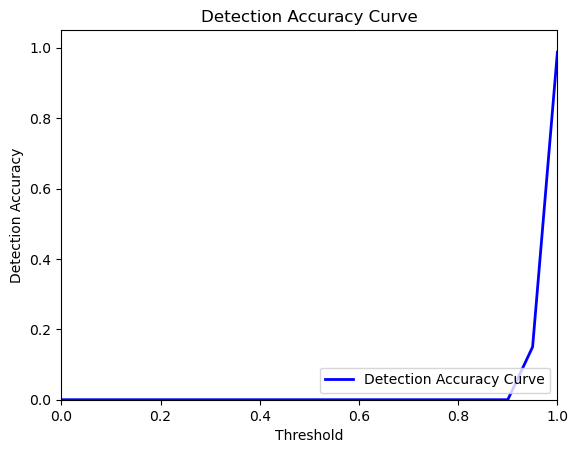

In [55]:
print("Similar fingerprints:")
for rank, (filename, score) in enumerate(similar_results[:5], 1):
    print(f"Rank {rank}: Filename: {filename}, Match Score: {score:.2f}")

print(f"\nImposter Score: {imposter_score:.2f}")

# ROC Curve
y_true = []
y_scores = []

for filename, feature_vector in all_feature_vectors:
    score = cosine_similarity(normalized_query_vector.reshape(1, -1), feature_vector.reshape(1, -1))[0][0]
    y_scores.append(score)
    y_true.append(1 if filename.startswith(query_image_path.split('_')[0]) else 0)

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# DAC Curve
thresholds = np.arange(0.0, 1.05, 0.05)
accuracies = []

for threshold in thresholds:
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    correct_predictions = sum(1 for pred, true in zip(y_pred, y_true) if pred == true)
    accuracy = correct_predictions / len(y_true)
    accuracies.append(accuracy)

plt.figure()
plt.plot(thresholds, accuracies, color='blue', lw=2, label='Detection Accuracy Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Detection Accuracy')
plt.title('Detection Accuracy Curve')
plt.legend(loc='lower right')
plt.show()


# CONCLUSION

In conclusion, our journey in developing a robust fingerprint indexing system has been marked by continuous exploration, experimentation, and refinement. By leveraging advanced techniques such as FFT-based feature extraction, quadrant-based image division, and integration with LS trees, we have devised a comprehensive solution capable of efficiently handling diverse fingerprint images while maintaining high levels of accuracy and reliability.

# TEAM

Aashritha Likki - SE21UCSE262

Alekhya Nadimpalli - SE21UCSE134

Shriya Poonamalli - SE21UCSE205

Srija Mallipudi - SE21UCSE216

Vaishnavi Kamisetti - SE21UCSE091